## 인스타로 제주도 맛집 크롤링하기

In [1]:
# 인스타그램 크롤링
# 인스타그램 검색결과 URL을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [3]:
# 필요 패키지 불러오기
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 웹 드라이버 실행
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')
# 제주도맛집이라는 키워드로 인스타그램 검색결과를 확인하는 URL 확인
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_43132\1083056825.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [8]:
# 첫번째 게시글을 찾아 클릭하여 열어보기
def select_first(driver):
    # F12를 통해 개발자 페이지로 가서 class명이 '_aagu'인 부분을 살펴보면 게시글에 해당된다
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)
select_first(driver)

* 위의 방법은 로그인을 일일히 해야하며, 그 이후 자신의 피드로 리다이렉트된다는 번거로움 존재, 아래와 같은 방법을 사용하여 처음부터 로그인을 하고 인스타 크롤링을 진행한다.

In [6]:
# 인스타그램 크롤링
# 인스타그램 검색결과 URL을 만드는 함수
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    return url

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time


# 크롬 드라이버를 로드
driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')

# 로그인 페이지로 이동
driver.get('https://www.instagram.com/accounts/login/')
time.sleep(2)

# 사용자 이름과 비밀번호를 입력
username = driver.find_element(By.NAME, 'username')
password = driver.find_element(By.NAME, 'password')
username.send_keys('사용자 아이디')
password.send_keys('사용자 비밀번호')

# 로그인 버튼을 클릭
login_button = driver.find_element(By.XPATH, '//button[@type="submit"]')
login_button.click()
time.sleep(5)

word = "제주도맛집"
url = insta_searching(word)
driver.get(url)

C:\Users\chunc\AppData\Local\Temp\ipykernel_4492\921766561.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/chromedriver/chromedriver.exe')


In [22]:
def select_first(driver):
    first = driver.find_element(By.CLASS_NAME, '_aagu')
    first.click()
    time.sleep(3)

select_first(driver)

In [5]:
# 패키지 불러오기
import re
from bs4 import BeautifulSoup

In [39]:
# 맛집 크롤링
def get_content(driver):
    # 현재 페이지 html정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문내용 가져오기
    try:
        # 태그명이 div, class명이 _a9zs인 태그 아래에 있는 span태그를 모두 선택하고,
        # 그 중 첫 번째 태그를 선택하여, 해당 태그의 텍스트 부분을 추출
        content = soup.select('div._a9zs > h1')[0].text
    except:
        content = ' '
    # 본문 내용에서 해시태그 가져오기(정규표현식 활용)
    # #으로 시작하여, #뒤에 연속된 문자(공백이나 #, \기호가 아닌 경우)를 모두 찾아서 리스트 형태로 저장
    tags = re.findall(r'#[^\s\<]+', content)
    # 날짜(작성일자) 정보 가져오기
    # 태그명이 time, class명이 _aaqe인 태그를 모두 선택하고
    # 그 중 첫번째 태그를 선택한 뒤, 해당 태그의 datetime 속성값의 0~9번째 글자 슬라이싱
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    # 좋아요 수 가져오기
    try:
        # 태그명이 div, class명이 다음과 같은 태그 바로 아래에 있는 span태그 모두 선택
        like = soup.select('div._ae2s._ae3v._ae3w > section._ae5m._ae5n._ae5o > div > div > span > a > span > span')[0].text
    except:
        like = 0
    # 위치(장소)정보 가져오기
    try:
        # div태그 중 class명이 _aaqm인 것을 선택해 화면에 노출되는 첫 번째 태그의 text를 가져옴
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    # 수집한 정보 저장하기
    data = [content, date, like, place, tags]
    return data
get_content(driver)

['(광고)제주도에서 쓰끼다시가 가장 잘나오고 서귀포에서 오션뷰로 회를 먹을수있는곳💜💜대포항 바로 앞에 큰 규모의 횟집에서 오션뷰로 즐길 수 있는 횟집으로,제주에서 횟감 하나만큼은 가장 싱싱하다고 자부할 수 있는 이곳!!제주도에서 스끼다시가 가장 잘 나오는 곳으로그때그때 가장 싱싱한 해산물만을 즐길 수 있는 맛집커플, 가족단위로 와서 힐링하기도 좋고대규모 좌석으로 대형버스 예약까지 많은 맛집!!👉🏻식사 후에는 바로 옆에 dp159카페에서 커피한잔까지 완벽한 맛집☕️☕️OCEAN VIEW 중문 큰갯물횟집0507-1360-1625제주 서귀포시 대포로 16111:50 - 22:0021:00 라스트오더#서귀포맛집 #제주중문맛집#서귀포횟집#중문횟집#제주도횟집#중문맛집#제주횟집#제주도민맛집#제주오션뷰맛집#서귀포맛집추천#제주도맛집',
 '2023-04-04',
 0,
 '',
 ['#서귀포맛집', '#제주중문맛집#서귀포횟집#중문횟집#제주도횟집#중문맛집#제주횟집#제주도민맛집#제주오션뷰맛집#서귀포맛집추천#제주도맛집']]

In [38]:
# 다음게시글 열기
def move_next(driver):
    right = driver.find_element(By.CLASS_NAME, '_aaqg')
    right.click()
    time.sleep(3)
move_next(driver)

In [63]:
# 여러 게시글 수집하기
# 검색어
word = '제주데이트'
# 인스타그램 검색페이지 URL만들기
url = insta_searching(word)

In [64]:
# 검색페이지 접속
driver.get(url)
time.sleep(3)

In [65]:
# 첫번째 게시글 클릭
select_first(driver)

In [66]:
results = []
# 여러 게시글 수집을 위해 크롤링할 게시글 수 지정
target = 100
for i in range(target):
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        # 게시글 수집에 오류 발생 시(네트워크 문제 등의 이유로), 2초 대기 후, 다음게시물로 넘어가도록 지정
        time.sleep(2)
        move_next(driver)
print(results[:2])

[['제주도 가면 방문1번지로 찍고 움직여야할 동문시장 디저트맛집이다.아이스크림으로 제주통합짱이라 말해도 과언이 아니다. 육지에선 쉽게 만날수 없는 소금빵아이스크림으로 단짠단짠한 맛을 쫄깃함과 함께 느낄수 있다니ㅠ 현재 제주도가면 인스타 인증 필찾 방문코스로 낙인찍혀버린 디저트 종합선물세트 제작소인 #솔브레 맛에 대한 논란을 종결시키러 스푸파가 왔다. 부드럽고 달달하니 입속에서 사르르 녹아내리는 우유눈꽃같은 맛에 갓구운 소금빵이 함께 만나 찍먹하는 순간 이 아이스크림말고 다른 아이스크림 못먹을 정도다. 지금도 자꾸 생각나는 이맛은 어쩌지...소금빵부터 도넛, 그리고 솔브레의 시그니처메뉴인 소금빵아이스크림까지 맛의 깊음을 느낄수 있는 이곳. 빈틈을 찾아볼수 없는 도넛부터 개성넘치는 소금빵까지 다양한 디저트를 판매하 사진으로도 너무 이뿐데 실물은 또 얼마나 깡패일까❤️ 제주도가면 재방문 1번지가 이곳이라구~🥰🥰[🤷스푸파의 종합 게시판🤷]\xa0✅🌸솔브레 메뉴판🌸📒가게 주소 : 제주 제주시 일도1동 동문로 10 1층 솔브레📒가게 영업시간 : 10:00~19:00📒솔브레 인스타 : @solbre_jejufghj @@솔브레로 한번 녹아볼래?\U0001fae0\U0001fae0#소금빵 #아이스크림 #제주카페 #제주카페추천 #제주맛집 #제주맛집추천 #제주빵지순례 #동문시장 #동문시장맛집 #kfood #제주데이트코스 #제주데이트 #제주가볼만한곳', '2023-03-30', 0, '제주도', ['#솔브레', '#소금빵', '#아이스크림', '#제주카페', '#제주카페추천', '#제주맛집', '#제주맛집추천', '#제주빵지순례', '#동문시장', '#동문시장맛집', '#kfood', '#제주데이트코스', '#제주데이트', '#제주가볼만한곳']], ['제주에서 인생피자 맛보고 왔습니다!!제주도에 어울리는 현무암피자와 화산폭발 비주얼 맛집🌟제주📍#리보스코화덕피자보기좋은 피자가 먹기에도 좋다 ~ 비주얼도 이쁜데 맛까지 완벽백종원 선생님도 다녀가신 아주 특별한 톳 도우 피자예요🍕바삭한

In [44]:
print(results)

[['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집', '2023-04-03', 0, '', ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집']], ['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 노량진수산시장이 있다면제주도엔 노형수산시장이 있다!!제주도에서 가장큰 규모의 횟집👍제주도에서 가장 저렴한 횟집👍활어회부터 해산물,대게,구이류까지모든 바다의맛이 한곳에!😍밤에는 포장마차 감성의 야외테라스에서 즐길수있고❤깔끔한 포장으로 언제어디서나즐길수 있는~🥂오늘은 이곳에서 소주각Go👉👉🧭노형수산시장주소 : 제주 제주시 한라대학로 7전화 : 064-745-8822영업시간 : 매일 14:00 ~ 새벽 02:00  새벽 01:00 라스트오더#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집', '2023-04-03', 0, '', ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집']], ['광고) 진심으로 추천해주고 싶은활어회맛집 "노형수산시장"서울의 

In [45]:
import pandas as pd

In [46]:
# 결과 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip.xlsx', index = False)

In [51]:
# 결과 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip2.xlsx', index = False)

In [57]:
# 결과 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuMatjip3.xlsx', index = False)

In [62]:
# 결과 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuCafe.xlsx', index = False)

In [67]:
# 결과 저장
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('crawling_jejuDate.xlsx', index = False)

In [70]:
# 여러 키워드로 검색한 결과를 저장하여 통합 저장
jeju_insta_df = pd.DataFrame([])
# 파일이 저장되어있는 위치
folder = './'
f_list = ['crawling_jejuMatjip.xlsx', 'crawling_jejuMatjip2.xlsx', 'crawling_jejuMatjip3.xlsx', 'crawling_jejuCafe.xlsx', 'crawling_jejuDate.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.columns = ['content', 'date', 'like', 'place', 'tags']

# 중복데이터 제거 후 저장

# content열의 데이터에 들어있는 게시글의 본문 내용이 동일하면 중복으로 판단하고 제거
# inplace = True 옵션을 사용해 원본 데이터 변경
jeju_insta_df.drop_duplicates(subset=['content'], inplace = True)

# 데이터 저장
jeju_insta_df.to_excel('crawling_jeju.xlsx', index = False)

C:\Users\chunc\AppData\Local\Temp\ipykernel_4492\967971069.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_4492\967971069.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_4492\967971069.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\Local\Temp\ipykernel_4492\967971069.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jeju_insta_df = jeju_insta_df.append(temp)
C:\Users\chunc\AppData\L

In [71]:
# 데이터 확인
jeju_insta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 99
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  280 non-null    object
 1   date     280 non-null    object
 2   like     280 non-null    int64 
 3   place    110 non-null    object
 4   tags     280 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.1+ KB


In [73]:
# 워드 클라우드
# 크롤링 결과 중 해시태그 불러오기
import pandas as pd
raw_total = pd.read_excel('crawling_jeju.xlsx')
raw_total['tags'][:3]

0    ['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#...
1    ['#제주공항근처맛집', '#제주공항근처맛집', '#제주맛집', '#제주시맛집', ...
2    ['#반영구입술#아마존베스트셀러#출근', '#초등부#초코크로와상#대바늘#어젯밤🎗#애...
Name: tags, dtype: object

In [75]:
# 해시태그 통합 저장
tags_total = []
for tags in raw_total['tags']:
    # 저장된 태그에서 "', '"를 기준으로 분할해준다
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [79]:
# 저장한 태그들 확인
tags_total[:30]

['#제주도맛집#제주맛집#제주공항근처횟집#제주횟집#제주도횟집#제주시횟집#제주회포장#제주도회포장#제주횟집추천#노형동맛집#연동맛집#드림타워맛집#이호테우해변맛집',
 '#제주공항근처맛집',
 '#제주공항근처맛집',
 '#제주맛집',
 '#제주시맛집',
 '#제주도맛집',
 '#용담동맛집',
 '#제주가볼만한곳',
 '#제주데이트',
 '#제주여행',
 '#제주핫플',
 '#제주도가볼만한곳',
 '#제주도데이트',
 '#제주도여행',
 '#제주도핫플',
 '#반영구입술#아마존베스트셀러#출근',
 '#초등부#초코크로와상#대바늘#어젯밤🎗#애월#동명동핫플#정읍#어제도#아기스타그램#도시락#어린이집간식',
 '#노후#일러스트#출산탈모#제주도맛집#학하동',
 '#맨투맨♎#구월동눈썹문신#공릉동맛집#기념일케이크',
 '#코스🍒#부케💪#덕스타그램#디지털펌#피부관리⚽#혜화#시청',
 '#애월맛집',
 '#애월흑돼지',
 '#애월해안도로맛집',
 '#애월흑돼지맛집',
 '#제주도맛집#제주도흑돼지맛집',
 '#애월핫플',
 '#애월오션뷰맛집',
 '#제주흑돼지맛집',
 '#애월가볼만한곳',
 '#제주돈아고내점']

In [80]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(100)

[('', 65),
 ('#제주맛집', 53),
 ('#제주여행', 50),
 ('#제주도맛집', 37),
 ('#제주데이트', 37),
 ('#제주카페', 31),
 ('#제주가볼만한곳', 24),
 ('#제주도', 23),
 ('#서귀포맛집', 20),
 ('#제주핫플', 18),
 ('#제주도여행', 18),
 ('#제주공항근처맛집', 16),
 ('#애월맛집', 16),
 ('#제주', 16),
 ('#제주도카페', 16),
 ('#제주시맛집', 15),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#제주도민맛집', 14),
 ('#제주여행코스', 14),
 ('#제주맛집추천', 13),
 ('#제주데이트코스', 13),
 ('#서귀포카페', 12),
 ('#제주도데이트', 11),
 ('#제주핫플레이스', 11),
 ('#제주공항맛집', 10),
 ('#중문맛집', 9),
 ('#애월카페', 9),
 ('#맞팔', 8),
 ('#제주도맛집추천', 8),
 ('#제주숙소', 8),
 ('#제주도가볼만한곳', 7),
 ('#협재맛집', 7),
 ('#맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주도카페추천', 7),
 ('#서귀포데이트', 7),
 ('#제주도핫플', 6),
 ('#먹방', 6),
 ('#먹팔', 6),
 ('#제주살이', 6),
 ('#일상', 6),
 ('#제주신상카페', 6),
 ('#여행', 6),
 ('#좋아요', 6),
 ('#제주여행추천', 6),
 ('#제주펜션', 6),
 ('#서귀포핫플', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주혼밥', 5),
 ('#데일리', 5),
 ('#제주공항', 5),
 ('#jeju', 5),
 ('#한림카페', 5),
 ('#팔로우', 5),
 ('#좋반', 5),
 ('#서귀포카페추천', 5),
 ('#제주포토존', 5),
 ('#함덕맛집', 4),
 ('#먹스타', 4),
 ('

In [85]:
# 데이터 정제
# 필요없는 해시태그 정의하여 제외시켜준다
STOPWORDS = ['', '#일상', '#맞팔', '#먹팔맞팔', '#울산맛집', 'ootd', '#fff', '#먹스타', '#먹스타맞팔', \
             '#소통', '#제주포토존', '#먹방', '#먹팔', '#좋아요', '#제주펜션', '#데일리', '#제주숙소', \
            '#팔로우', '#좋반']
tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 53),
 ('#제주여행', 50),
 ('#제주도맛집', 37),
 ('#제주데이트', 37),
 ('#제주카페', 31),
 ('#제주가볼만한곳', 24),
 ('#제주도', 23),
 ('#서귀포맛집', 20),
 ('#제주핫플', 18),
 ('#제주도여행', 18),
 ('#제주공항근처맛집', 16),
 ('#애월맛집', 16),
 ('#제주', 16),
 ('#제주도카페', 16),
 ('#제주시맛집', 15),
 ('#제주현지인맛집', 15),
 ('#제주카페추천', 15),
 ('#제주도민맛집', 14),
 ('#제주여행코스', 14),
 ('#제주맛집추천', 13),
 ('#제주데이트코스', 13),
 ('#서귀포카페', 12),
 ('#제주도데이트', 11),
 ('#제주핫플레이스', 11),
 ('#제주공항맛집', 10),
 ('#중문맛집', 9),
 ('#애월카페', 9),
 ('#제주도맛집추천', 8),
 ('#제주도가볼만한곳', 7),
 ('#협재맛집', 7),
 ('#맛집', 7),
 ('#제주도여행코스', 7),
 ('#제주도카페추천', 7),
 ('#서귀포데이트', 7),
 ('#제주도핫플', 6),
 ('#제주살이', 6),
 ('#제주신상카페', 6),
 ('#여행', 6),
 ('#제주여행추천', 6),
 ('#서귀포핫플', 6),
 ('#제주흑돼지맛집', 5),
 ('#제주중문맛집', 5),
 ('#제주애월맛집', 5),
 ('#제주혼밥', 5),
 ('#제주공항', 5),
 ('#jeju', 5),
 ('#한림카페', 5),
 ('#서귀포카페추천', 5),
 ('#함덕맛집', 4),
 ('#한림맛집', 4)]

In [86]:
# 시각화를 위해 워드 클라우드 실행
import matplotlib.pyplot as plt
import seaborn as sns
# 폰트 설정
# from matplotlib import font_manager, rc
# import sys

# if sys.platform in ["win32", "win64"]:
#     font_name = "malgun gothic"
# elif sys.platform == "darwin":
#     font_name = "AppleGothic"

# rc('font',family=font_name)

In [87]:
# 빈도수 기준 상위 30개의 데이터를 데이터프레임으로 변환
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<Axes: xlabel='counts', ylabel='tags'>

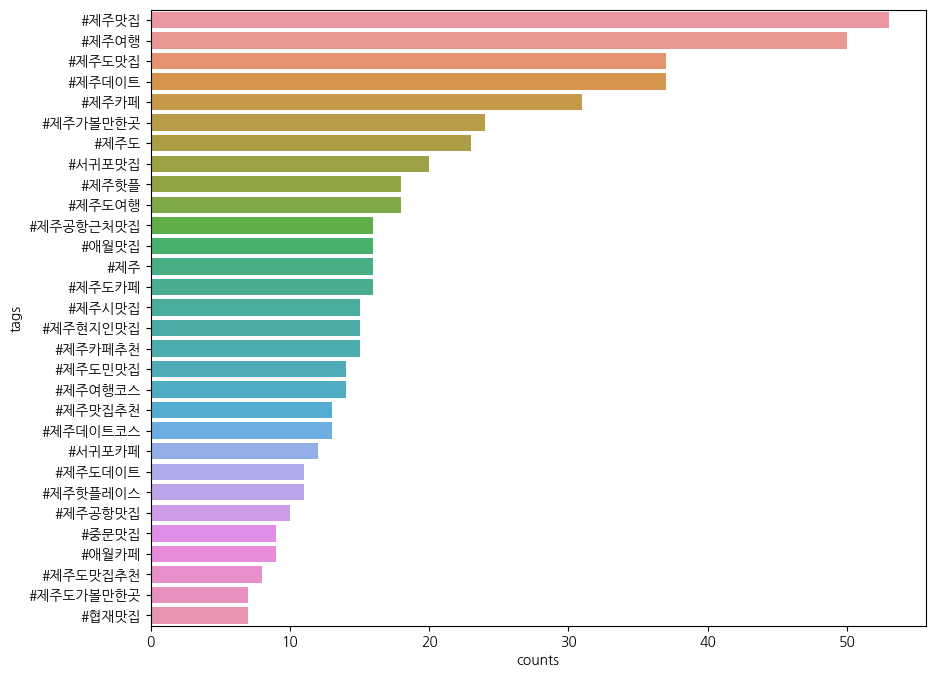

In [88]:
# 막대 차트 그리기
plt.figure(figsize = (10, 8))

sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [89]:
!pip install wordcloud

     -------------------------------------- 152.9/152.9 kB 4.6 MB/s eta 0:00:00


In [90]:
# 워드 클라우드를 위한 패키지 불러오기
from wordcloud import WordCloud
import platform

In [91]:
# 워드 클라우드에 필요한 글꼴 지정
# 윈도우의 경우
if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
# Mac 의 경우
elif platform.system() == "Darwin":
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

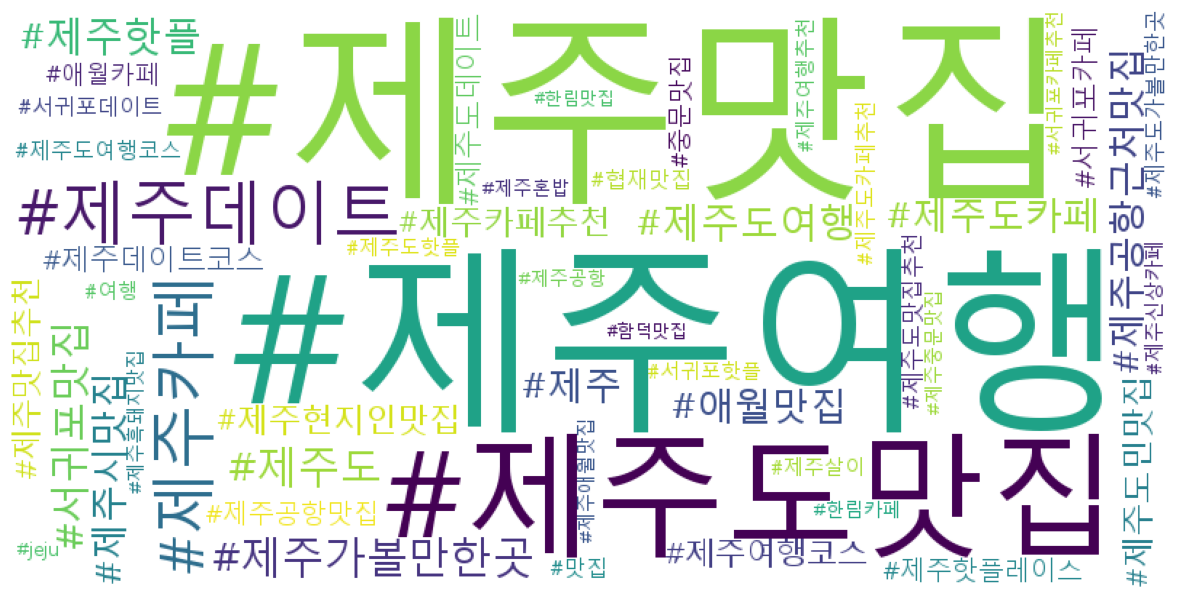

In [100]:
# 워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,	# 사용할 글꼴 경로 
                    background_color="white",	# 배경색
                    max_words=50,		# 최대 몇 개의 단어를 나타낼 것인지 설정
                    relative_scaling= 0.3, 	# 워드 클라우드 내 글자들의 상대적인 크기(0~1)
                    width = 800,		# 워드클라우드 가로
                    height = 400		# 워드클라우드 세로
                 ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
# 원하는 경로에 워드 클라우드 이미지 파일 저장
plt.savefig('./tag-wordcloud.png')

In [101]:
# 지도 시각화
# 크롤링 된 데이터에서 위치 정보가 저장되어 있는 place 선택한 뒤
# value_counts() 함수를 통해 빈도수 집계
location_counts = raw_total['place'].value_counts()
location_counts

제주도 제주              20
제주도                  7
퍼플모스 Purple Moss     3
Jeju-do              3
루페이퍼 Rupaper         2
                    ..
애월                   1
제주에인감귤밭              1
니모메빈티지라운지            1
초록달과자점               1
삼성혈                  1
Name: place, Length: 75, dtype: int64

In [103]:
# pandas 데이터프레임 형태로 저장
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
제주도 제주,20
제주도,7
퍼플모스 Purple Moss,3
Jeju-do,3
루페이퍼 Rupaper,2


In [105]:
location_counts_df.to_excel('./location_counts.xlsx')

In [106]:
# 위치 정보만 선택 후 list형태로 변환 한 뒤 저장
locations = list(location_counts.index)
locations

['제주도 제주',
 '제주도',
 '퍼플모스 Purple Moss',
 'Jeju-do',
 '루페이퍼 Rupaper',
 '환상의 섬 Jeju Island',
 '제주도 제주시',
 '제주도 서귀포',
 '제주도 Jeju Island',
 '노턴',
 '여누카페',
 '보롬왓',
 'Baalamb In Jeju',
 '제주참숯가마',
 '애월읍 장전리',
 '위즈커피',
 '골목커피',
 '비밀의숲',
 '카페코지 Cafe Coji',
 '불광천',
 '레이오버 제주',
 'One and only - 원앤온리 제주',
 '바닐라파레트',
 '조천읍 와흘리',
 '함덕해수욕장',
 '대흘리',
 '카페 노티드 제주 애월 - Cafe Knotted Jeju Aewol',
 '제주신라면세점',
 '너럭',
 '제주도 중문',
 '제주 구좌읍 세화리',
 'Amber Purehill Hotels&Resorts',
 '오지하우스:호주식당',
 '제주도 제주시 노형동',
 '건강과 성 박물관',
 '제주도애월해안로',
 '손방둥이 공방',
 '오션갤러리 호텔앤리조트',
 '제주 함덕 서우봉 해변',
 '브라보비치',
 '카페도도다',
 'Sinchang Windmill Coastal Road',
 '카페 마노르블랑 제주',
 '경주',
 '이월드 (E-WORLD)',
 '맛집탐방',
 '성읍탐라식당',
 'Jeju Island,Korea',
 '제주신화월드',
 'Naive Silhouette - 나이브실루엣',
 '금능해수욕장',
 '묵전 제주',
 '동백포레스트',
 '닭머르',
 '별방진',
 '제주도 한경면',
 '석 인 장 碩 仁 張',
 '제주여행',
 'Palgil',
 '제주시 조천읍 와산리',
 '제주도제주시 삼화지구',
 '숙성도',
 '제주도 애월읍',
 '이층빵집 굽는아방',
 '사이카레',
 '서귀포 쌍둥이 횟집',
 '옹포리',
 '키친요디2호관',
 '동문시장 Dongmoon Market 東門水産市場',
 'wiee.jeju',
 '애월',

In [107]:
# 카카오 키워드 검색 API로 위치 정보 가져오기
# 패키지 불러오기
import requests

In [108]:
searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
headers = {
    "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
}
# url 주소에 정보를 요청(header에 저장된 인증키값을 전달)하고, 요청 후 받은 결과를 json 형태로 불러옴
places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 합정동 473',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2132676511',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정푸르지오점',
  'place_url': 'http://place.map.kakao.com/2132676511',
  'road_address_name': '서울 마포구 월드컵로3길 14',
  'x': '126.91247704039314',
  'y': '37.550909116022105'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '1522-3232',

In [109]:
# 카카오 키워드 검색 API로 위치 정보 검색 함수
def find_places(searching):
    # 접속 URL
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
        "Authorization": "KakaoAK b3d8529dc0fc9d5c4c8e66df2f0f9184"
    }
    # API 요청 & 정보 받기
    places = requests.get(url, headers = headers).json()['documents']
    
    # 필요한 정보 선택
    # 최대 5개 정보가 저장되어 넘어오고, 그 중 첫번째 결과를 활용
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    # 장소명, x좌표, y좌표, 검색어를 리스트형태로 저장
    data = [name, x, y, searching]
    
    return data

In [111]:
# 진행사항 모니터링 가능한 패키지
from tqdm import tqdm_notebook
import time

In [113]:
# 인스타그램 데이터의 위치정보 검색
locations_inform = []
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)
        locations_inform.append(data)
        # 과도하게 빠른 요청 때문에 차단 오류 발생 가능성 방지
        time.sleep(0.5)
    except:
        pass
    
locations_inform

C:\Users\chunc\AppData\Local\Temp\ipykernel_4492\1408201311.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/75 [00:00<?, ?it/s]

[['제주도', '126.54587355630036', '33.379777816446165', '제주도 제주'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도'],
 ['올레길 18코스(제주원도심-조천 올레)',
  '126.58214303914238',
  '33.52522810308715',
  '제주도 제주시'],
 ['올레길 7코스(서귀포-월평 올레)', '126.51530966206293', '33.23738579332568', '제주도 서귀포'],
 ['제주도', '126.54587355630036', '33.379777816446165', '제주도 Jeju Island'],
 ['노턴', '127.48756687650614', '36.63793879189138', '노턴'],
 ['여누카페', '126.673670981413', '33.4322161409169', '여누카페'],
 ['보롬왓', '126.75249576943', '33.4134970849722', '보롬왓'],
 ['제주참숯가마찜질방', '126.86341600718973', '33.369142317425506', '제주참숯가마'],
 ['왕벚꽃거리', '126.383825919428', '33.4521219667359', '애월읍 장전리'],
 ['위즈커피', '126.432128534267', '33.4874749915111', '위즈커피'],
 ['골목커피', '126.373756993927', '34.8035129331836', '골목커피'],
 ['비밀의숲', '126.75493209633262', '33.45360917744684', '비밀의숲'],
 ['불광천', '126.906234509821', '37.5800209041095', '불광천'],
 ['레이오버', '126.812358181761', '33.5586485959582', '레이오버 제주'],
 ['원앤온리', '126.319192490757', 

In [128]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official', '경도', '위도', '인스타위치명']
locations_inform_df.to_excel('./locations.xlsx', index = False)

In [129]:
# 게시량
location_counts_df = pd.read_excel('./location_counts.xlsx', index_col = 0)
# 위치 정보
locations_inform_df = pd.read_excel('./locations.xlsx')

In [152]:
location_data = pd.merge(locations_inform_df, location_counts_df, how = 'inner', left_on = 'name_official', right_index = True)
location_data.head()

,name_official,경도,위도,인스타위치명,place
0,제주도,126.545874,33.379778,제주도 제주,7
1,제주도,126.545874,33.379778,제주도,7
4,제주도,126.545874,33.379778,제주도 Jeju Island,7
5,노턴,127.487567,36.637939,노턴,2
6,여누카페,126.673671,33.432216,여누카페,1


In [153]:
# 동일한 name_official을 가지는 데이터의 인스타그램 게시 횟수 합치기
location_data = location_data.pivot_table(index = ['name_official', '경도', '위도'], values = 'place', aggfunc = 'sum')
location_data.head()

,,,place
name_official,경도,위도,
골목커피,126.373757,34.803513,1
금능해수욕장,126.235890,33.390449,1
너럭,126.508814,33.516197,1
노턴,127.487567,36.637939,2
닭머르,126.611897,33.536475,1


In [154]:
# 병합한 데이터 저장
location_data = location_data.reset_index()
location_data.to_excel('location_inform.xlsx')

In [141]:
# 지도 표시
import folium

In [142]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location=Mt_Hanla, zoom_start = 11)

In [155]:
for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count)*2
    long = float(location_data['위도'][i])
    lat = float(location_data['경도'][i])
    # 원을 생성(위치, 크기, 색상, 원 이름)
    folium.CircleMarker((long, lat), radius = size, color = 'red', popup = name).add_to(map_jeju)
    
map_jeju

In [156]:
# 지도 저장
map_jeju.save('jeju.html')

In [157]:
# 그룹으로 표시
from folium.plugins import MarkerCluster

In [172]:
locations = []
names = []
for i in range(len(location_data)):
    # 행 하나씩
    data = location_data.iloc[i]
    locations.append((float(data['위도']), float(data['경도'])))
    names.append(data['name_official'])
    
icon_create_function = """\
function(cluster){
    return L.divIcon({
    html:'<b>' + cluster.getChildCount() + '</b>',
    className: 'marker-cluster marker-cluster-large',
    iconsize: new L.point(30, 30)
    });
}"""

In [173]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location=Mt_Hanla, zoom_start = 11)

In [174]:
marker_cluster = MarkerCluster(
    locations = locations, popups = names,
    name = 'Jeju',
    overlay = True,
    control = True,
    icon_create_function = icon_create_function
)

In [175]:
marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)
map_jeju2

In [176]:
# 지도 저장
map_jeju2.save('jeju_cluster.html')